<a href="https://colab.research.google.com/github/jpantojaj/DIP-CS_AI/blob/main/Credit_Scoring_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desarrollo de un Modelo de Credit Scoring**

### **1. Carga Inicial de Librerías**

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### **2. Entendimiento y Analisis Exploratorio de datos**

In [2]:
df_clase = pd.read_csv('Base_SolicitudesCreditoEfectivo_201307_201505.csv', sep = ";")
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [3]:
df_clase.shape

(31944, 31)

In [4]:
df_clase.columns

Index(['CODMES', 'CODSOLICITUD', 'DEUDA', 'PLAZO_CREDITO', 'FLG_GARANTIA',
       'MIN_MES_DE_DEFAULT', 'FLG_DEFAULT_12M', 'SEGMENTOCLIENTE',
       'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
       'HIPOTECARIO_RELACIONADA', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'NUMERO_DE_PAGOS_PDH',
       'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
       'MONTO_TC_MEMBRESIA', 'FLG_TC_VISA', 'FLG_TC_MC'],
      dtype='object')

In [5]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  int64  
 1   CODSOLICITUD             31944 non-null  int64  
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  int64  
 5   MIN_MES_DE_DEFAULT       3449 non-null   float64
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  int64  
 9   VEHICULAR_RELACIONADA    31944 non-null  int64  
 10  HIPOTECARIO_RELACIONADA  31944 non-null  int64  
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [6]:
df_clase['CODMES']=df_clase['CODMES'].astype(str)
df_clase['CODSOLICITUD']=df_clase['CODSOLICITUD'].astype(str)
df_clase['MIN_MES_DE_DEFAULT']=df_clase['MIN_MES_DE_DEFAULT'].astype(str)
df_clase['FLG_GARANTIA']=df_clase['FLG_GARANTIA'].astype(str)
df_clase['TARJETA_RELACIONADA']=df_clase['TARJETA_RELACIONADA'].astype(str)
df_clase['VEHICULAR_RELACIONADA']=df_clase['VEHICULAR_RELACIONADA'].astype(str)
df_clase['HIPOTECARIO_RELACIONADA']=df_clase['HIPOTECARIO_RELACIONADA'].astype(str)
df_clase['CLASIF_SISTEMA_ULT_12M']=df_clase['CLASIF_SISTEMA_ULT_12M'].astype(str)
df_clase['FLG_PDH']=df_clase['FLG_PDH'].astype(str)
df_clase['FLG_TC_VISA']=df_clase['FLG_TC_VISA'].astype(str)
df_clase['FLG_TC_MC']=df_clase['FLG_TC_MC'].astype(str)

In [7]:
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,nan,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,nan,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,nan,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,nan,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [8]:
df_clase=df_clase.drop_duplicates()
df_clase.reset_index()
df_clase.shape

(31944, 31)

In [9]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  object 
 1   CODSOLICITUD             31944 non-null  object 
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  object 
 5   MIN_MES_DE_DEFAULT       31944 non-null  object 
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  object 
 9   VEHICULAR_RELACIONADA    31944 non-null  object 
 10  HIPOTECARIO_RELACIONADA  31944 non-null  object 
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [10]:
target_count = df_clase['FLG_DEFAULT_12M'].value_counts()
target_count

,count
FLG_DEFAULT_12M,
0,29920
1,2024


# Buen_Pagador: 29920
# 1 Mora_12M: 2024
Bad rate: 0.06336088154269973


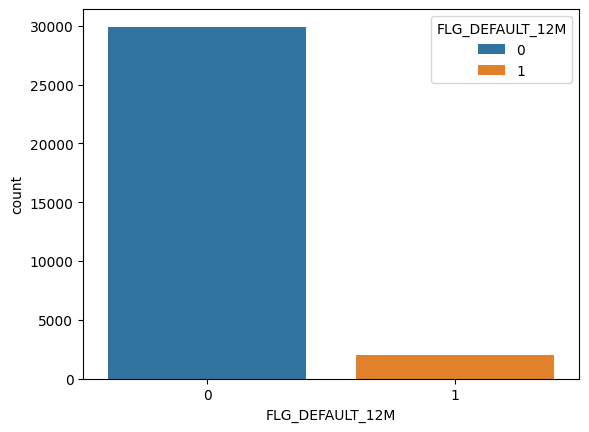

In [11]:
sns.countplot(data = df_clase, x = "FLG_DEFAULT_12M", hue="FLG_DEFAULT_12M")
target_count = df_clase.FLG_DEFAULT_12M.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

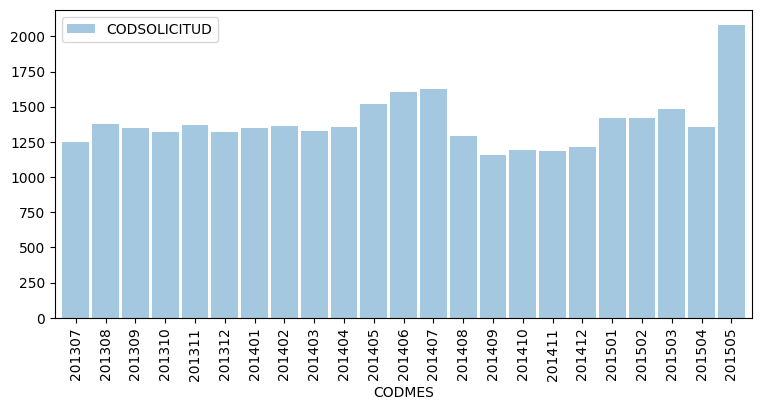

In [12]:
a1=df_clase.pivot_table(values="CODSOLICITUD", index="CODMES", aggfunc="count", sort=True)
a1.plot(kind = 'bar',
       #stacked = 'True',          # Muestra las barras apiladas
       alpha = 0.4,               # nivel de transparencia
       width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
       figsize=(9,4));            # Cambiamos el tamaño de la figura

<Axes: xlabel='CODMES'>

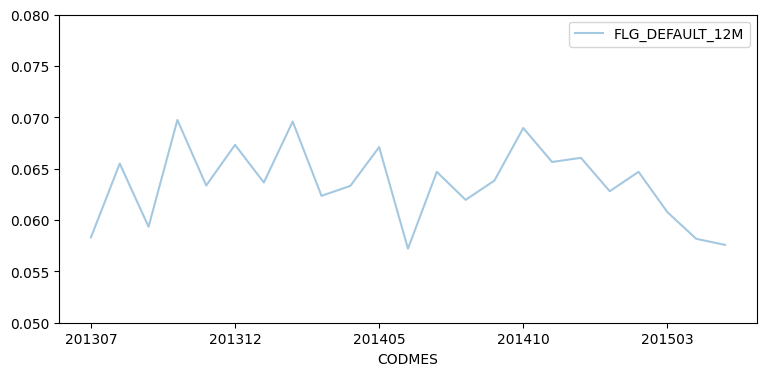

In [13]:
a2=df_clase.pivot_table(values="FLG_DEFAULT_12M", index="CODMES", aggfunc="mean", sort=True)
a2.plot(alpha = 0.4, figsize=(9,4), ylim=(0.05,0.08))

### ***Hagamos el Análisis Univariado***

Revisemos la cantidad de nulos y sus proporciones por variable

In [14]:
null_values = pd.concat([df_clase.isnull().sum(), df_clase.isnull().sum() / len(df_clase)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values

,number_null_values,ratio_null_values
CODMES,0,0.000000
CODSOLICITUD,0,0.000000
DEUDA,0,0.000000
PLAZO_CREDITO,0,0.000000
FLG_GARANTIA,0,0.000000
MIN_MES_DE_DEFAULT,0,0.000000
FLG_DEFAULT_12M,0,0.000000
SEGMENTOCLIENTE,0,0.000000
TARJETA_RELACIONADA,0,0.000000
VEHICULAR_RELACIONADA,0,0.000000


Revisemos sus estadísticos básicos

In [15]:
df_clase.select_dtypes(include=['number']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,31944.0,5769.284906,5848.504517,8.791365,1602.717111,3768.298333,7786.406583,2.054835e+05
PLAZO_CREDITO,31944.0,39.996588,15.623734,6.000000,24.000000,48.000000,48.000000,6.000000e+01
FLG_DEFAULT_12M,31944.0,0.063361,0.243615,0.000000,0.000000,0.000000,0.000000,1.000000e+00
ATRASO_MAXIMO_ULT_6M,31944.0,0.254070,3.028339,0.000000,0.000000,0.000000,0.000000,2.310000e+02
ATRASO_MAXIMO_ULT_12M,31941.0,1.074168,38.857057,0.000000,0.000000,0.000000,0.000000,5.647000e+03
ATRASO_MAXIMO_ULT_24M,31937.0,2.107931,47.275929,0.000000,0.000000,0.000000,0.000000,5.647000e+03
MESES_AHORROS_ULT_6M,31266.0,5.157935,1.449751,1.000000,5.000000,6.000000,6.000000,6.000000e+00
MEDIANA_AHORROS_ULT_6M,31942.0,7161.642671,8621.384272,0.000000,1703.222083,4325.187267,9396.200433,8.185772e+05
DEUDA_TOTAL_SISTEMA,28763.0,24409.216018,58799.081039,0.000000,1505.645000,6745.890000,20973.860000,1.458561e+06
NUMERO_DE_PAGOS_PDH,31944.0,16.291948,9.419303,0.000000,7.000000,24.000000,24.000000,2.400000e+01


In [16]:
df_clase.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
CODMES,31944,23,201505,2084
CODSOLICITUD,31944,31944,31944,1
FLG_GARANTIA,31944,2,0,30605
MIN_MES_DE_DEFAULT,31944,37,nan,28495
SEGMENTOCLIENTE,31944,7,CLIENTES ORO,22101
TARJETA_RELACIONADA,31944,2,1,19914
VEHICULAR_RELACIONADA,31944,2,0,31612
HIPOTECARIO_RELACIONADA,31944,2,0,31212
CLASIF_SISTEMA_ULT_12M,31944,6,0.0,23640
FLG_PDH,31944,2,1,26825


Revisemos como se distribuye cada variable

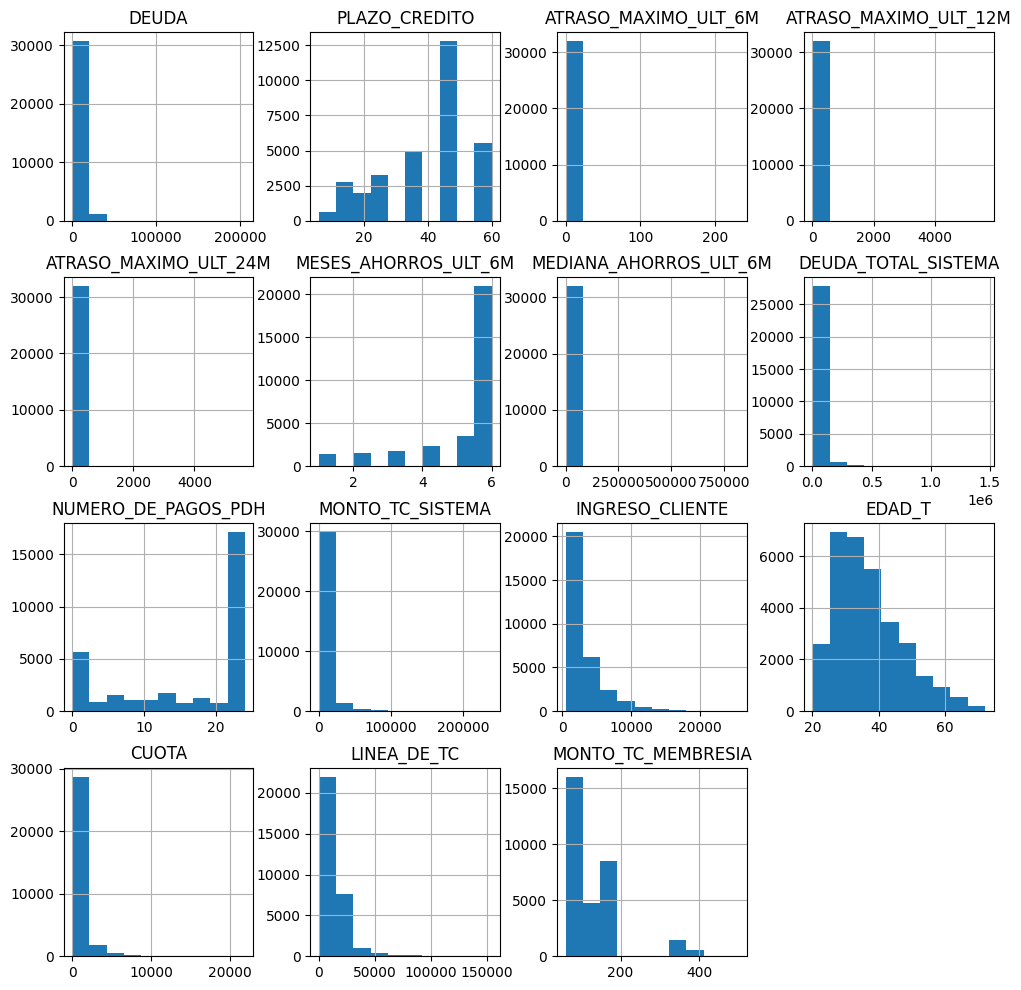

In [17]:
df_clase.drop(columns = ['FLG_DEFAULT_12M']).hist(figsize = (12, 12))
plt.show()

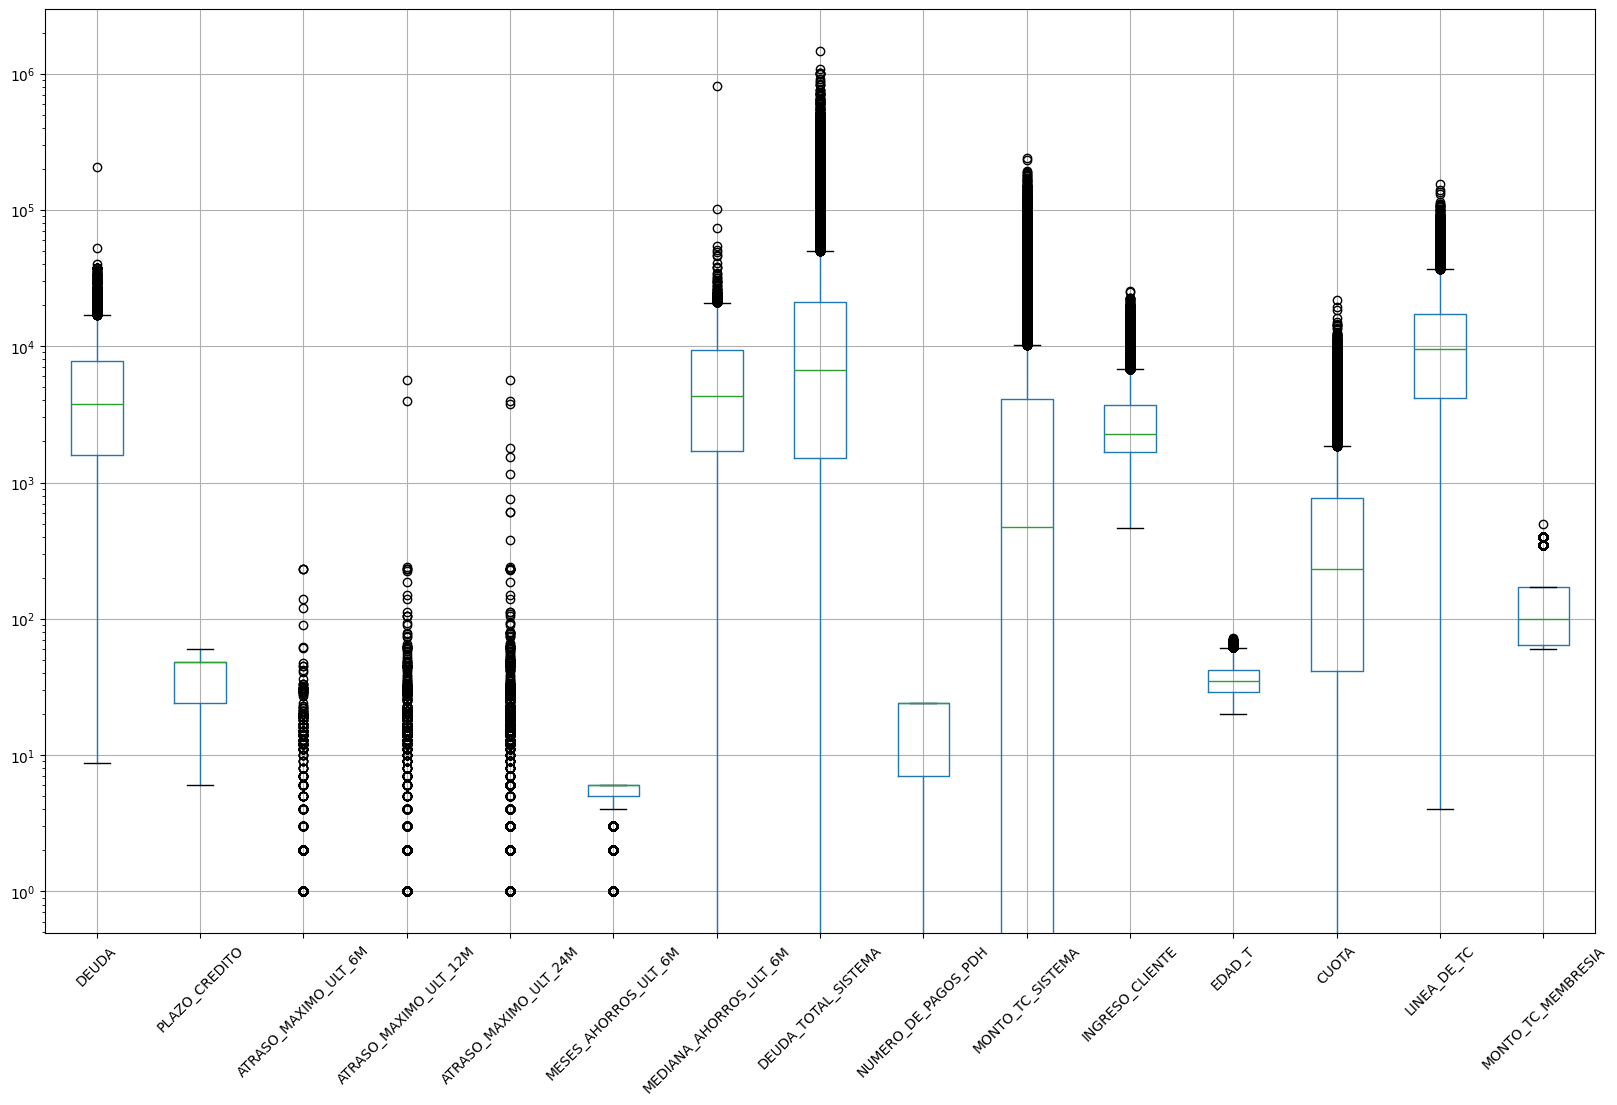

In [18]:
df_clase.drop(columns = ['FLG_DEFAULT_12M']).boxplot(figsize = (20, 12))
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

In [19]:
def outliers_col(df):
  for columna in df:
    if df[columna].dtype != object:
      q1 = stats.scoreatpercentile(df[columna], 25)
      q3 = stats.scoreatpercentile(df[columna], 75)
      iqr = q3-q1
      lim_inf = q1-1.5*iqr
      lim_sup = q3+1.5*iqr
      n_outliers_inf = len(df[(df[columna]<lim_inf)])
      n_outliers_sup = len(df[(df[columna]>lim_sup)])
      print("{} | {} | {}".format(
          df[columna].name,
          n_outliers_inf,
          n_outliers_sup
          ))

In [20]:
outliers_col(df_clase)

DEUDA | 0 | 2126
PLAZO_CREDITO | 0 | 0
FLG_DEFAULT_12M | 0 | 2024
ATRASO_MAXIMO_ULT_6M | 0 | 2005
ATRASO_MAXIMO_ULT_12M | 0 | 4154
ATRASO_MAXIMO_ULT_24M | 0 | 6634
MESES_AHORROS_ULT_6M | 4635 | 0
MEDIANA_AHORROS_ULT_6M | 0 | 3318
DEUDA_TOTAL_SISTEMA | 0 | 1880
NUMERO_DE_PAGOS_PDH | 0 | 0
MONTO_TC_SISTEMA | 0 | 4470
INGRESO_CLIENTE | 0 | 2512
EDAD_T | 0 | 350
CUOTA | 0 | 2867
LINEA_DE_TC | 0 | 1200
MONTO_TC_MEMBRESIA | 0 | 2015


# **3. Feature Engineering**

#### 3.1 Tratamiento de Missing:
####Según el caso elegiremos rellenar estos casos con un valor usualmente conocido (dado el tipo de variable que estemos analizando), o imputar con la mediana o el valor más frecuente, según sea numérica o categórica respectivamente

In [21]:
# Para partir las bases
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [22]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 18.2 MB/s eta 0:00:00


### Partición Train y test (considerando estratificación de la Y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clase.drop("FLG_DEFAULT_12M", axis=1),
    df_clase["FLG_DEFAULT_12M"],
    test_size=0.3,
    random_state=0,
    stratify=df_clase["FLG_DEFAULT_12M"] #este punto es importante para asegurar un adecuado muestreo de la variable objetivo
)

X_train.shape, X_test.shape

((22360, 30), (9584, 30))

In [24]:
# Comprobación de la proporción de Y en train
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

np.float64(0.06337209302325582)

In [25]:
# Comprobación de la proporción de Y en test
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])

np.float64(0.0633347245409015)

In [26]:
# Revisión de la proporción de nulos por variable
X_train.isnull().mean().where(X_train.isnull().mean()>0)

,0
CODMES,NaN
CODSOLICITUD,NaN
DEUDA,NaN
PLAZO_CREDITO,NaN
FLG_GARANTIA,NaN
MIN_MES_DE_DEFAULT,NaN
SEGMENTOCLIENTE,NaN
TARJETA_RELACIONADA,NaN
VEHICULAR_RELACIONADA,NaN
HIPOTECARIO_RELACIONADA,NaN


### Variable numéricas

In [27]:
var_num = X_train.select_dtypes(include = ["number"])
var_num.isnull().mean().where(var_num.isnull().mean()>0)

,0
DEUDA,NaN
PLAZO_CREDITO,NaN
ATRASO_MAXIMO_ULT_6M,NaN
ATRASO_MAXIMO_ULT_12M,0.000045
ATRASO_MAXIMO_ULT_24M,0.000179
MESES_AHORROS_ULT_6M,0.020081
MEDIANA_AHORROS_ULT_6M,0.000089
DEUDA_TOTAL_SISTEMA,0.100134
NUMERO_DE_PAGOS_PDH,NaN
MONTO_TC_SISTEMA,NaN


### Variables categóricas

In [28]:
var_cat = X_train.select_dtypes(exclude = ["number"])
var_cat.isnull().mean().where(var_cat.isnull().mean()>0)

,0
CODMES,NaN
CODSOLICITUD,NaN
FLG_GARANTIA,NaN
MIN_MES_DE_DEFAULT,NaN
SEGMENTOCLIENTE,NaN
TARJETA_RELACIONADA,NaN
VEHICULAR_RELACIONADA,NaN
HIPOTECARIO_RELACIONADA,NaN
CLASIF_SISTEMA_ULT_12M,NaN
FLG_PDH,NaN


### Generamos un pipeline para tratamiento de Nulos

In [29]:
# Llamemos a la librería feature engine
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer

In [30]:
# Construyamos alternativamente un nuevo pipeline con todos los métodos de imputación en uno solo
pipe_2 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
    ]
)

In [31]:
pipe_2.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PROFESION',
                                               'ZONA_DEL_DESEMBOLSO',
                                               'ESTADO_CIVIL']))])

In [32]:
pipe_2.named_steps["median_imputer"].imputer_dict_

{'LINEA_DE_TC': 9609.0, 'EDAD_T': 35.0, 'INGRESO_CLIENTE': 2271.1773555}

In [33]:
pipe_2.named_steps["arbitrary_imputer"].imputer_dict_

{'CUOTA': 0,
 'DEUDA_TOTAL_SISTEMA': 0,
 'MEDIANA_AHORROS_ULT_6M': 0,
 'MESES_AHORROS_ULT_6M': 0,
 'ATRASO_MAXIMO_ULT_24M': 0,
 'ATRASO_MAXIMO_ULT_12M': 0,
 'MONTO_TC_MEMBRESIA': 0}

In [34]:
pipe_2.named_steps['mode_imputer'].imputer_dict_

{'PROFESION': 'TECNICO',
 'ZONA_DEL_DESEMBOLSO': 'AREQUIPA',
 'ESTADO_CIVIL': 'SOL'}

In [35]:
X_train_t = pipe_2.transform(X_train)
X_test_t = pipe_2.transform(X_test)

In [36]:
X_train_t.isnull().mean()

,0
CODMES,0.0
CODSOLICITUD,0.0
DEUDA,0.0
PLAZO_CREDITO,0.0
FLG_GARANTIA,0.0
MIN_MES_DE_DEFAULT,0.0
SEGMENTOCLIENTE,0.0
TARJETA_RELACIONADA,0.0
VEHICULAR_RELACIONADA,0.0
HIPOTECARIO_RELACIONADA,0.0


In [37]:
X_test_t.isnull().mean()

,0
CODMES,0.0
CODSOLICITUD,0.0
DEUDA,0.0
PLAZO_CREDITO,0.0
FLG_GARANTIA,0.0
MIN_MES_DE_DEFAULT,0.0
SEGMENTOCLIENTE,0.0
TARJETA_RELACIONADA,0.0
VEHICULAR_RELACIONADA,0.0
HIPOTECARIO_RELACIONADA,0.0


### 3.2 Tratamiento de Valores Raros o Poco frecuentes
En este punto, nos detenemos para revisar problemas de cardinalidad y si existen valores raros o poco frecuentes en nuestras variables categóricas

In [38]:
cat_cols=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
          'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC']

In [39]:
# Examinemos esto en la muestra de train
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_train_t[col].nunique())

variable:  FLG_GARANTIA  nro de categorias:  2
variable:  SEGMENTOCLIENTE  nro de categorias:  7
variable:  TARJETA_RELACIONADA  nro de categorias:  2
variable:  VEHICULAR_RELACIONADA  nro de categorias:  2
variable:  HIPOTECARIO_RELACIONADA  nro de categorias:  2
variable:  CLASIF_SISTEMA_ULT_12M  nro de categorias:  6
variable:  FLG_PDH  nro de categorias:  2
variable:  PROFESION  nro de categorias:  170
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6
variable:  FLG_TC_VISA  nro de categorias:  3
variable:  FLG_TC_MC  nro de categorias:  3


In [40]:
#Examinemos esto en la muestra de test
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_test_t[col].nunique())

variable:  FLG_GARANTIA  nro de categorias:  2
variable:  SEGMENTOCLIENTE  nro de categorias:  5
variable:  TARJETA_RELACIONADA  nro de categorias:  2
variable:  VEHICULAR_RELACIONADA  nro de categorias:  2
variable:  HIPOTECARIO_RELACIONADA  nro de categorias:  2
variable:  CLASIF_SISTEMA_ULT_12M  nro de categorias:  6
variable:  FLG_PDH  nro de categorias:  2
variable:  PROFESION  nro de categorias:  138
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6
variable:  FLG_TC_VISA  nro de categorias:  3
variable:  FLG_TC_MC  nro de categorias:  3


In [41]:
# Analicemos la variable Profesión
unique_to_train_set = [x for x in X_train_t.PROFESION.unique() if x not in X_test_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.PROFESION.unique() if x not in X_train_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 37
El nro de categorias que aparecen en el test y no en el train es 5


In [42]:
# Analicemos la variable ZONA_DEL_DESEMBOLSO
unique_to_train_set = [x for x in X_train_t.ZONA_DEL_DESEMBOLSO.unique() if x not in X_test_t.ZONA_DEL_DESEMBOLSO.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.ZONA_DEL_DESEMBOLSO.unique() if x not in X_train_t.ZONA_DEL_DESEMBOLSO.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [43]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 2
El nro de categorias que aparecen en el test y no en el train es 0


#### Generamos un pipeline para tratamiento de valores raros

In [44]:
from feature_engine.encoding import RareLabelEncoder

In [45]:
# Construyamos alternativamente un nuevo pipeline con todos los métodos de imputación y codificación de valores raros en uno solo
pipe_3 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (
            "rare_encoder",
            RareLabelEncoder(tol=0.001,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
    ]
)

In [46]:
pipe_3.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PROFESION',
                                               'ZONA_DEL_DESEMBOLSO',
                                               'ESTADO_CIVIL'])),
                ('rare_encoder',
                 RareLabelEncoder(n_categories=5, tol=0.001,
                                  variables=['PROFESION', 'SEGMENTOCLIENTE']))])

In [47]:
X_train_t = pipe_3.transform(X_train)
X_test_t = pipe_3.transform(X_test)

In [48]:
# Comprobando el funcionamiento del pipeline
# Analicemos la variable PROFESION
unique_to_train_set = [x for x in X_train_t.PROFESION.unique() if x not in X_test_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.PROFESION.unique() if x not in X_train_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [49]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [50]:
X_train_t.PROFESION.value_counts()

,count
PROFESION,
TECNICO,7888
ADMINISTRADOR,3955
INGENIERO,2202
CONTADOR,1151
Rare,706
OBRERO / OPERADOR,583
ECONOMISTA,393
ABOGADO,376
MECANICO,362


In [51]:
X_train_t.SEGMENTOCLIENTE.value_counts()

,count
SEGMENTOCLIENTE,
CLIENTES ORO,15423
CLIENTES PLATINUM SEGM 2,6646
CLIENTES SIGNATURE,201
CLIENTES PLATINUM SEGM 1,85
Rare,5


### IMPORTANTE: Hasta aqui tenemos un pipeline para imputar nuestras variables numéricas y categóricas en caso de missing, además de generar un grupo de casos "Raros" para las variables categóricas donde encontramos problemas.

### 3.3 Tratamiento de Outliers y Escalamiento

In [52]:
X_train_t.describe().T

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,5800.149362,5912.375849,8.791365,1614.985000,3768.298333,7869.050000,2.054835e+05
PLAZO_CREDITO,22360.0,40.092084,15.547062,6.000000,24.000000,48.000000,48.000000,6.000000e+01
ATRASO_MAXIMO_ULT_6M,22360.0,0.274508,3.405186,0.000000,0.000000,0.000000,0.000000,2.310000e+02
ATRASO_MAXIMO_ULT_12M,22360.0,1.037478,38.114128,0.000000,0.000000,0.000000,0.000000,5.647000e+03
ATRASO_MAXIMO_ULT_24M,22360.0,2.151699,49.190130,0.000000,0.000000,0.000000,0.000000,5.647000e+03
MESES_AHORROS_ULT_6M,22360.0,5.055903,1.605819,0.000000,5.000000,6.000000,6.000000,6.000000e+00
MEDIANA_AHORROS_ULT_6M,22360.0,7189.387085,9092.414168,0.000000,1712.270417,4362.920626,9507.471667,8.185772e+05
DEUDA_TOTAL_SISTEMA,22360.0,22073.208282,56672.958615,0.000000,556.875000,5136.870000,18553.420000,1.079214e+06
NUMERO_DE_PAGOS_PDH,22360.0,16.261538,9.426468,0.000000,7.000000,24.000000,24.000000,2.400000e+01
MONTO_TC_SISTEMA,22360.0,5604.264393,14250.281961,0.000000,0.000000,478.565000,4188.745000,2.393316e+05


In [53]:
outliers_col(X_train_t)

DEUDA | 0 | 1459
PLAZO_CREDITO | 0 | 0
ATRASO_MAXIMO_ULT_6M | 0 | 1409
ATRASO_MAXIMO_ULT_12M | 0 | 2903
ATRASO_MAXIMO_ULT_24M | 0 | 4614
MESES_AHORROS_ULT_6M | 3689 | 0
MEDIANA_AHORROS_ULT_6M | 0 | 2284
DEUDA_TOTAL_SISTEMA | 0 | 2567
NUMERO_DE_PAGOS_PDH | 0 | 0
MONTO_TC_SISTEMA | 0 | 3110
INGRESO_CLIENTE | 0 | 2229
EDAD_T | 0 | 512
CUOTA | 0 | 2288
LINEA_DE_TC | 0 | 917
MONTO_TC_MEMBRESIA | 0 | 1427


In [54]:
num_cols=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

In [55]:
from feature_engine.outliers import Winsorizer
capper = Winsorizer(
    variables=num_cols,
    capping_method="quantiles",
    tail="right",
    fold=0.01,
)
capper.fit(X_train_t)

Winsorizer(capping_method='quantiles', fold=0.01,
           variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M', 'ATRASO_MAXIMO_ULT_12M',
                      'ATRASO_MAXIMO_ULT_24M', 'MEDIANA_AHORROS_ULT_6M',
                      'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA',
                      'INGRESO_CLIENTE', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
                      'MONTO_TC_MEMBRESIA'])

In [56]:
#capper.right_tail_caps_

In [57]:
X_train_t = capper.transform(X_train_t)
X_test_t = capper.transform(X_test_t)

In [58]:
#plot_boxplot_and_hist(X_train_t2, "var")
X_train_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,5767.696927,5662.719977,8.791365,1614.985000,3768.298333,7869.050000,23574.760420
PLAZO_CREDITO,22360.0,40.092084,15.547062,6.000000,24.000000,48.000000,48.000000,60.000000
ATRASO_MAXIMO_ULT_6M,22360.0,0.130188,0.615047,0.000000,0.000000,0.000000,0.000000,5.000000
ATRASO_MAXIMO_ULT_12M,22360.0,0.592576,2.510538,0.000000,0.000000,0.000000,0.000000,16.000000
ATRASO_MAXIMO_ULT_24M,22360.0,1.270438,4.230890,0.000000,0.000000,0.000000,0.000000,25.000000
MESES_AHORROS_ULT_6M,22360.0,5.055903,1.605819,0.000000,5.000000,6.000000,6.000000,6.000000
MEDIANA_AHORROS_ULT_6M,22360.0,7146.544957,7272.373742,0.000000,1712.270417,4362.920626,9507.471667,24065.564330
DEUDA_TOTAL_SISTEMA,22360.0,20508.116018,43687.720951,0.000000,556.875000,5136.870000,18553.420000,280120.580200
NUMERO_DE_PAGOS_PDH,22360.0,16.261538,9.426468,0.000000,7.000000,24.000000,24.000000,24.000000
MONTO_TC_SISTEMA,22360.0,5286.382362,11951.112587,0.000000,0.000000,478.565000,4188.745000,72022.006800


### Ahora hagamos el escalado de variables de las variables numéricas

In [59]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler().set_output(transform="pandas")
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [60]:
num_cols=['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

In [61]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(X_train_t[num_cols])
X_train_t_numoutscal = scaler.transform(X_train_t[num_cols])
X_test_t_numoutscal = scaler.transform(X_test_t[num_cols])

In [62]:
X_train_t_numoutscal.describe().T

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,0.319696,0.905446,-0.601130,-0.344306,0.000000e+00,0.655694,3.166974
PLAZO_CREDITO,22360.0,-0.329496,0.647794,-1.750000,-1.000000,0.000000e+00,0.000000,0.500000
ATRASO_MAXIMO_ULT_6M,22360.0,0.130188,0.615047,0.000000,0.000000,0.000000e+00,0.000000,5.000000
ATRASO_MAXIMO_ULT_12M,22360.0,0.592576,2.510538,0.000000,0.000000,0.000000e+00,0.000000,16.000000
ATRASO_MAXIMO_ULT_24M,22360.0,1.270438,4.230890,0.000000,0.000000,0.000000e+00,0.000000,25.000000
MESES_AHORROS_ULT_6M,22360.0,-0.944097,1.605819,-6.000000,-1.000000,0.000000e+00,0.000000,0.000000
MEDIANA_AHORROS_ULT_6M,22360.0,0.357095,0.932930,-0.559693,-0.340036,5.833685e-17,0.659964,2.527535
DEUDA_TOTAL_SISTEMA,22360.0,0.854122,2.427562,-0.285436,-0.254493,0.000000e+00,0.745507,15.279806
NUMERO_DE_PAGOS_PDH,22360.0,-0.455204,0.554498,-1.411765,-1.000000,0.000000e+00,0.000000,0.000000
MONTO_TC_SISTEMA,22360.0,1.147794,2.853149,-0.114250,-0.114250,0.000000e+00,0.885750,17.079923


In [63]:
from sklearn.compose import ColumnTransformer

In [64]:
# Actualicemos nuestro pipeline
pipe_4 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'])
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (
            "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
        (   "capper",
            Winsorizer(variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'], capping_method="quantiles", tail="right", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

        )
    ]
)

In [65]:
pipe_4.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 Cat...
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e', RobustScaler(),
                                                  ['DEUDA', 'PLAZO_CREDITO',
                                                   'ATRASO_MAXIMO_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'NUMERO_DE_PAGOS_PDH',
                                                   'MONTO_TC_SISTEMA',
                                                   'INGRESO_CLIENTE', 'EDAD_T',
                                                   'CUOTA', 'LINEA_DE_TC',
                                                   'MONTO_TC_MEMBRESIA'])],
                                   verbose_feature_names_out=False))])

In [66]:
X_train_t = pipe_4.transform(X_train)
X_test_t = pipe_4.transform(X_test)

In [67]:
X_train_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,0.319696,0.905446,-0.601130,-0.344306,0.000000e+00,0.655694,3.166974
PLAZO_CREDITO,22360.0,-0.329496,0.647794,-1.750000,-1.000000,0.000000e+00,0.000000,0.500000
ATRASO_MAXIMO_ULT_6M,22360.0,0.130188,0.615047,0.000000,0.000000,0.000000e+00,0.000000,5.000000
ATRASO_MAXIMO_ULT_12M,22360.0,0.592576,2.510538,0.000000,0.000000,0.000000e+00,0.000000,16.000000
ATRASO_MAXIMO_ULT_24M,22360.0,1.270438,4.230890,0.000000,0.000000,0.000000e+00,0.000000,25.000000
MESES_AHORROS_ULT_6M,22360.0,-0.944097,1.605819,-6.000000,-1.000000,0.000000e+00,0.000000,0.000000
MEDIANA_AHORROS_ULT_6M,22360.0,0.357095,0.932930,-0.559693,-0.340036,5.833685e-17,0.659964,2.527535
DEUDA_TOTAL_SISTEMA,22360.0,0.854122,2.427562,-0.285436,-0.254493,0.000000e+00,0.745507,15.279806
NUMERO_DE_PAGOS_PDH,22360.0,-0.455204,0.554498,-1.411765,-1.000000,0.000000e+00,0.000000,0.000000
MONTO_TC_SISTEMA,22360.0,1.147794,2.853149,-0.114250,-0.114250,0.000000e+00,0.885750,17.079923


## **4. Feature Selection**


###Planteemos algunos filtros básicos inicialmente

#### Constantes

In [90]:
constant_features_num = [feat for feat in X_train_t[num_cols].columns if X_train_t[feat].std() == 0]
len(constant_features_num)

0

In [ ]:
#X_train_t.drop(labels=constant_features_num, axis=1, inplace=True)
#X_test_t.drop(labels=constant_features_num, axis=1, inplace=True)
#X_train_t.shape, X_test_t.shape

In [91]:
constant_features_cat = [feat for feat in X_train_t[cat_cols].columns if X_train_t[feat].nunique() == 1]
len(constant_features_cat)

0

In [ ]:
#X_train_t.drop(labels=constant_features_cat, axis=1, inplace=True)
#X_test_t.drop(labels=constant_features_cat, axis=1, inplace=True)
#X_train_t.shape, X_test_t.shape

#### Cuasi constante

In [92]:
from sklearn.feature_selection import VarianceThreshold

In [93]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train_t[num_cols])

VarianceThreshold(threshold=0.01)

In [94]:
sum(sel.get_support())

np.int64(15)

In [95]:
quasi_constant = X_train_t[num_cols].columns[~sel.get_support()]
len(quasi_constant)

0

In [96]:
quasi_constant_feat = []
for feature in X_train_t[cat_cols].columns:
    predominant = X_train[feature].value_counts(
        normalize=True).sort_values(ascending=False).values[0]
    if predominant > 0.99:
        quasi_constant_feat.append(feature)
len(quasi_constant_feat)

0

### Empecemos a filtrar en función de su grado de aporte predictivo

### Ahora, podemos determinar cuanto aportan estas variables? para esto calculemos su IV

In [ ]:
tot_train_t=pd.concat([X_train_t[cat_cols], y_train], axis=1)
tot_train_t.head()

In [ ]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [ ]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('WOE')
    plt.title(str('WOE por ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

### Generemos un reporte con todas los IVs

In [ ]:
def getFeatureIV_Importance(df,features,target):
    featureIV_Importance=list()
    for v in features:
      iv, rep=calculate_woe_iv(df,v,target)
      featureIV_Importance.append(iv)
    display(pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False))

### 4.1 Variables Categóricas

In [ ]:
getFeatureIV_Importance(tot_train_t,cat_cols,"FLG_DEFAULT_12M")

### En este punto, quedémonos solo con las variables cuyo IV es mayor al 2% y menor a 50%

In [ ]:
len(cat_cols)

In [ ]:
cat_cols_2=['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_GARANTIA','HIPOTECARIO_RELACIONADA']

In [ ]:
len(cat_cols_2)

In [ ]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t, 'SEGMENTOCLIENTE', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v1)

In [ ]:
IV_v2, ReporteWoe_v2=calculate_woe_iv(tot_train_t, 'CLASIF_SISTEMA_ULT_12M', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v2)

In [ ]:
IV_v3, ReporteWoe_v3=calculate_woe_iv(tot_train_t, 'FLG_PDH', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v3)

In [ ]:
IV_v4, ReporteWoe_v4=calculate_woe_iv(tot_train_t, 'PROFESION', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v4)

In [ ]:
IV_v5, ReporteWoe_v5=calculate_woe_iv(tot_train_t, 'ZONA_DEL_DESEMBOLSO', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v5)

In [ ]:
IV_v6, ReporteWoe_v6=calculate_woe_iv(tot_train_t, 'ESTADO_CIVIL', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v6)

### 4.2 Variables numéricas

#### En este punto discretizo para luego encontrar el IV de las variables

In [ ]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [ ]:
disc1 = EqualFrequencyDiscretiser(q=10,
                                  variables=num_cols,
                                  return_boundaries=True,)
disc1.fit(X_train_t[num_cols])

In [ ]:
X_train_t_numdisc=disc1.transform(X_train_t[num_cols])
X_test_t_numdisc=disc1.transform(X_test_t[num_cols])

In [ ]:
X_train_t_numdisc.head()

### Veamos cuales son las variables numéricas más importantes, basado en su IV

In [ ]:
tot_train_t2=pd.concat([X_train_t_numdisc, y_train], axis=1)
tot_train_t2.head()

In [ ]:
getFeatureIV_Importance(tot_train_t2,num_cols,"FLG_DEFAULT_12M")

### Nuevamente, en este punto también solo quedémonos con las variables numéricas con IV mayor a 2% y menor a 50%

In [ ]:
len(num_cols)

In [ ]:
num_cols_2=['MEDIANA_AHORROS_ULT_6M','INGRESO_CLIENTE','MESES_AHORROS_ULT_6M','NUMERO_DE_PAGOS_PDH','PLAZO_CREDITO','LINEA_DE_TC','EDAD_T',
            'MONTO_TC_MEMBRESIA','DEUDA','ATRASO_MAXIMO_ULT_24M','DEUDA_TOTAL_SISTEMA','ATRASO_MAXIMO_ULT_12M']

In [ ]:
len(num_cols_2)

In [ ]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t2, 'MEDIANA_AHORROS_ULT_6M', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v1)

In [ ]:
IV_v2, ReporteWoe_v2=calculate_woe_iv(tot_train_t2, 'INGRESO_CLIENTE', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v2)

In [ ]:
IV_v3, ReporteWoe_v3=calculate_woe_iv(tot_train_t2, 'MESES_AHORROS_ULT_6M', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v3)

In [ ]:
IV_v4, ReporteWoe_v4=calculate_woe_iv(tot_train_t2, 'EDAD_T', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v4)

### 4.3 Codificación de variables

#### Variables Categóricas

In [ ]:
from feature_engine.encoding import WoEEncoder

In [ ]:
encoder_2 = WoEEncoder(variables=cat_cols,
                       fill_value=0) #ignore_format=False
encoder_2.fit(X_train_t[cat_cols], y_train)

In [ ]:
X_train_woe_enc = encoder_2.transform(X_train_t[cat_cols])
X_test_woe_enc = encoder_2.transform(X_test_t[cat_cols])

In [ ]:
X_train_woe_enc.head()

### Actualizamos nuestro pipeline con todo el flujo de tratamiento de datos

In [ ]:
pipe_5 = Pipeline(
    [
        (   "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'])
        ),
        (   "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (   "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
        (   "capper",
            Winsorizer(variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'], capping_method="quantiles", tail="right", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        ),
        (   "encoder_2",
            WoEEncoder(variables=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
          'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC'],
                       fill_value=0)
        ),
    ]
)

In [ ]:
pipe_5.fit(X_train,y_train)

In [ ]:
X_train_t_p = pipe_5.transform(X_train)
X_test_t_p = pipe_5.transform(X_test)

In [ ]:
X_train_t_p.head()

### 4.4 Análisis de Correlaciones
En este punto, verifiquemos si existe correlación en las variables predictoras que hemos elegido, con el fin de depurarlas

In [ ]:
# Creemos una función para identificar de manera masiva a las variables correlacionadas, en caso de tener un mayor volumen de variables
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [ ]:
X_train_t2=pd.concat([X_train_t_p[cat_cols_2], X_train_t_p[num_cols_2]], axis=1)
X_test_t2=pd.concat([X_test_t_p[cat_cols_2], X_test_t_p[num_cols_2]], axis=1)
X_train_t2.head()

In [ ]:
corr_features = correlation(X_train_t2, 0.5)
len(set(corr_features))

In [ ]:
from feature_engine.selection import DropCorrelatedFeatures
sel = DropCorrelatedFeatures(
    threshold=0.5,
    method='pearson',
    missing_values='ignore'
)
sel.fit(X_train_t2)

In [ ]:
X_train_t2_p = sel.transform(X_train_t2)
X_test_t2_p = sel.transform(X_test_t2)

In [ ]:
X_train_t2_p.shape, X_test_t2_p.shape

In [ ]:
X_train_t2_p.columns

In [ ]:
cat_cols_3=['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_GARANTIA']

In [ ]:
num_cols_3=['MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'LINEA_DE_TC', 'EDAD_T', 'DEUDA', 'DEUDA_TOTAL_SISTEMA', 'ATRASO_MAXIMO_ULT_12M']

### Alternativamente usaremos las variables numéricas discretizadas y codificadas

In [ ]:
X_train_t_numdisc.columns

In [ ]:
X_train_t_numdisc.shape

In [ ]:
encoder_4 = WoEEncoder(#variables=num_cols,
                       fill_value=0) #ignore_format=False
encoder_4.fit(X_train_t_numdisc, y_train)

In [ ]:
X_train_woe_enc2 = encoder_4.transform(X_train_t_numdisc)
X_test_woe_enc2 = encoder_4.transform(X_test_t_numdisc)

In [ ]:
X_train_woe_enc2.head()

In [ ]:
X_train_t3_p=pd.concat([X_train_t2_p[cat_cols_3], X_train_woe_enc2[num_cols_3]], axis=1)
X_test_t3_p=pd.concat([X_test_t2_p[cat_cols_3], X_test_woe_enc2[num_cols_3]], axis=1)

### Actualizamos nuestro pipeline con todo el flujo de tratamiento de datos

In [ ]:
pipe_6 = Pipeline(
    [
        (   "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'])
        ),
        (   "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (   "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
        (   "capper",
            Winsorizer(variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'], capping_method="quantiles", tail="right", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])],remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")
        ),
        (   "encoder_2",
            WoEEncoder(variables=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
          'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC'],
                       fill_value=0)
        ),
        (   "discretiser_1",
            EqualFrequencyDiscretiser(q=10, variables=['DEUDA','PLAZO_CREDITO','ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M','ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M','MEDIANA_AHORROS_ULT_6M',
                                                       'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH','MONTO_TC_SISTEMA','INGRESO_CLIENTE','EDAD_T','CUOTA','LINEA_DE_TC','MONTO_TC_MEMBRESIA'],
                                      return_boundaries=True)
        ),
        (   "encoder_4",
            WoEEncoder(variables=['DEUDA','PLAZO_CREDITO','ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M','ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M','MEDIANA_AHORROS_ULT_6M','DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH',
                                  'MONTO_TC_SISTEMA','INGRESO_CLIENTE','EDAD_T','CUOTA','LINEA_DE_TC','MONTO_TC_MEMBRESIA'],
                       fill_value=0)
        ),
        (   "var_selector",
            ColumnTransformer([('selector', 'passthrough', ['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION','ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_GARANTIA','MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M',
                                                            'LINEA_DE_TC','EDAD_T', 'DEUDA', 'DEUDA_TOTAL_SISTEMA', 'ATRASO_MAXIMO_ULT_12M'])], remainder='drop', verbose_feature_names_out=False).set_output(transform="pandas")
        )
    ]
)

In [ ]:
pipe_6.fit(X_train,y_train)

In [ ]:
X_train_t_p = pipe_6.transform(X_train)
X_test_t_p = pipe_6.transform(X_test)

#### A partir de aqui X_train_t3_p o X_train_t_p se pueden usar indistintamente dado que generan la misma base, lo mismo con los test

## **5. Entrenamiento del Modelo**
En esta sección construiremos tres tipos de modelos y los evaluaremos para quedarnos con el mejor de ellos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
logit = LogisticRegression()
logit.fit(X_train_t2_p, y_train)
pred_train_logit = logit.predict_proba(X_train_t2_p)
pred_test_logit = logit.predict_proba(X_test_t2_p)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit[:,1])))

In [ ]:
fi=pd.Series(logit.coef_[0],index=logit.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

In [ ]:
logit_2 = LogisticRegression()
logit_2.fit(X_train_t3_p, y_train)
pred_train_logit_2 = logit_2.predict_proba(X_train_t3_p)
pred_test_logit_2 = logit_2.predict_proba(X_test_t3_p)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit_2[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_2[:,1])))

In [ ]:
fi=pd.Series(logit_2.coef_[0],index=logit_2.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

In [ ]:
logit_3 = LogisticRegression()
logit_3.fit(X_train_t_p, y_train)
pred_train_logit_3 = logit_3.predict_proba(X_train_t_p)
pred_test_logit_3 = logit_3.predict_proba(X_test_t_p)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit_3[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_3[:,1])))


In [ ]:
rf = RandomForestClassifier(random_state=39)
rf.fit(X_train_t2_p, y_train)
pred_train_rf = rf.predict_proba(X_train_t2_p)
pred_test_rf = rf.predict_proba(X_test_t2_p)
print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train_rf[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))

In [ ]:
gbc = GradientBoostingClassifier(random_state=44)
gbc.fit(X_train_t2_p, y_train)
pred_train_gbc = gbc.predict_proba(X_train_t2_p)
pred_test_gbc = gbc.predict_proba(X_test_t2_p)
print('Train set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_train, pred_train_gbc[:,1])))
print('Test set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))

### En este punto haremos un zoom en las técnicas tanto tradicionales (en este caso Regresión Logística) como las Técnicas Avanzadas (Random Forest, Gradient Boosting, etc)

## **5.1. Regresión Logística**

### Usemos statmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_t3_p_addcons = sm.add_constant(X_train_t3_p)
logit_sm = sm.Logit(y_train,X_train_t3_p_addcons)
results_logit_sm = logit_sm.fit()

In [ ]:
results_logit_sm.summary()

In [ ]:
X_test_t3_p_addcons = sm.add_constant(X_test_t3_p)

In [ ]:
y_test.value_counts()

In [ ]:
607/(8977+607)

In [ ]:
results_logit_sm.predict(X_test_t3_p_addcons).hist(figsize = (5, 3))
plt.show()

In [ ]:
tr = 0.5
pred_test_logit_sm = np.where(results_logit_sm.predict(X_test_t3_p_addcons) > tr, 1, 0)
pred_test_logit_sm

In [ ]:
pd.crosstab(y_test, pred_test_logit_sm , rownames = ['Actual'], colnames = ['Predicted'])

In [ ]:
pd.crosstab(y_test, pred_test_logit_sm , rownames = ['Actual'], colnames = ['Predicted'])/y_test.shape[0]

### Usemos scikitlearn

In [ ]:
logit_skl = LogisticRegression(penalty='l2', class_weight='balanced') #class_weight='balanced' ; #penalty='l2' (por default)
logit_skl.fit(X_train_t3_p, y_train)

In [ ]:
logit_skl.intercept_

In [ ]:
logit_skl_summary = pd.DataFrame(X_train_t3_p.columns.values, columns=['Features'])
logit_skl_summary['Weights'] = logit_skl.coef_[0]
logit_skl_summary

In [ ]:
tr = 0.5
pred_test_logit_skl = np.where(logit_skl.predict_proba(X_test_t3_p)[:,1] > tr, 1, 0)
pred_test_logit_skl

In [ ]:
pd.crosstab(y_test, pred_test_logit_skl , rownames = ['Actual'], colnames = ['Predicted'])

In [ ]:
pd.crosstab(y_test, pred_test_logit_skl , rownames = ['Actual'], colnames = ['Predicted'])/y_test.shape[0]

#### Tambien podemos sacar esto de forma directa con las clases accuracy score y confusion matrix de scikitlearn

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score

In [ ]:
accuracy_score(y_test, logit_skl.predict(X_test_t3_p))

In [ ]:
balanced_accuracy_score(y_test, logit_skl.predict(X_test_t3_p))

In [ ]:
confusion_matrix(y_test, logit_skl.predict(X_test_t3_p), labels=[0,1])

TN | FP

FN | TP

In [ ]:
pred_train_logit_skl = logit_skl.predict_proba(X_train_t_p)
pred_test_logit_skl = logit_skl.predict_proba(X_test_t_p)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit_skl[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_skl[:,1])))

### Entrenemos un nuevo modelo de regresión logística usando los dataset procesados por optimal binning

#### Primero, generemos un nuevo dataset con las variables seleccionadas, ahora aplicando el optimal binning

In [ ]:
pip install optbinning

In [ ]:
from optbinning import OptimalBinning
from optbinning import BinningProcess

In [ ]:
X_train_t4_p=pd.concat([X_train_t[cat_cols_3], X_train_t[num_cols_3]], axis=1)
X_test_t4_p=pd.concat([X_test_t[cat_cols_3], X_test_t[num_cols_3]], axis=1)

In [ ]:
binning_process = BinningProcess(variable_names=X_train_t4_p.columns.tolist())

In [ ]:
binning_process.fit(X_train_t4_p, y_train)

In [ ]:
X_train_t4_p_optbinned = binning_process.transform(X_train_t4_p)
X_test_t4_p_optbinned = binning_process.transform(X_test_t4_p)

In [ ]:
X_train_t4_p_optbinned.head()

In [ ]:
for variable in X_train_t4_p.columns:
    optb = binning_process.get_binned_variable(name=variable)
    binning_table = optb.binning_table.build()
    print(f"Puntos de corte para '{variable}': {optb.splits}")
    print(f"Tabla de binning para '{variable}':\n{binning_table}\n")

#### Ahora entrenemos el modelo y hallemos alguna métricas iniciales

In [ ]:
logit_skl_optb = LogisticRegression(penalty='l2', class_weight='balanced') #class_weight='balanced' ; #penalty='l2' (por default)
logit_skl_optb.fit(X_train_t4_p_optbinned, y_train)

In [ ]:
logit_skl_optb.intercept_

In [ ]:
logit_skl_optb_summary = pd.DataFrame(X_train_t4_p_optbinned.columns.values, columns=['Features'])
logit_skl_optb_summary['Weights'] = logit_skl_optb.coef_[0]
logit_skl_optb_summary

In [ ]:
accuracy_score(y_test, logit_skl_optb.predict(X_test_t4_p_optbinned))

In [ ]:
balanced_accuracy_score(y_test, logit_skl_optb.predict(X_test_t4_p_optbinned))

In [ ]:
confusion_matrix(y_test, logit_skl_optb.predict(X_test_t4_p_optbinned), labels=[0,1])

TN | FP

FN | TP

#### CONCLUSION LOGIT

In [ ]:
pred_train_logit_skl_optb = logit_skl_optb.predict_proba(X_train_t4_p_optbinned)
pred_test_logit_skl_optb = logit_skl_optb.predict_proba(X_test_t4_p_optbinned)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit_skl_optb[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_skl_optb[:,1])))

In [ ]:
pred_test_logit_skl_optb[:,1]

## **5.2. Modelos Ensamblados (basados en Arboles de Decisión)**

## **5.2.0 Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
DTClasif = DecisionTreeClassifier(max_depth=5, random_state=0) #max_depth=5, ccp_alpha=0.001
DTClasif.fit(X_train_t3_p, y_train)

In [ ]:
fi=pd.Series(DTClasif.feature_importances_ , index=DTClasif.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

In [ ]:
accuracy_score(y_test, DTClasif.predict(X_test_t3_p))

In [ ]:
balanced_accuracy_score(y_test, DTClasif.predict(X_test_t3_p))

In [ ]:
confusion_matrix(y_test, DTClasif.predict(X_test_t3_p), labels=[0,1])

TN | FP

FN | TP

In [ ]:
pred_train_DTClasif = DTClasif.predict_proba(X_train_t3_p)
pred_test_DTClasif = DTClasif.predict_proba(X_test_t3_p)
print('Train set')
print('Decision Tree Classifier roc-auc: {}'.format(roc_auc_score(y_train, pred_train_DTClasif[:,1])))
print('Test set')
print('Decision Tree Classifier roc-auc: {}'.format(roc_auc_score(y_test, pred_test_DTClasif[:,1])))

In [ ]:
#Grafiquemos el decision tree
#plt.figure(figsize=(15,12))
#plot_tree(DTClasif_1, filled=True,
#          feature_names=['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION',
#                          'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_GARANTIA',
#                          'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'LINEA_DE_TC',
#                          'EDAD_T', 'DEUDA', 'DEUDA_TOTAL_SISTEMA', 'ATRASO_MAXIMO_ULT_12M'])
#plt.show()

### Probemos con diferentes combinaciones de hiperparámetros (hiperparameter tuning), esta es la base para encontrar un modelo óptimo.

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
DTClasif_1 = DecisionTreeClassifier(random_state=0)
# combinaciones de hiperparametros
dt_param_grid = dict(
    max_depth= [None, 5, 10, 20],
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 5],
    ccp_alpha= [0.0, 0.001, 0.01, 0.1]
)

# Grid Search
reg = GridSearchCV(DTClasif_1, dt_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_dt= reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Decision Tree):", search_dt.best_params_)
print("Mejor accuracy (Decision Tree):", search_dt.best_score_)

In [ ]:
results = pd.DataFrame(search_dt.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_train_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [ ]:
DTClasif_2 = DecisionTreeClassifier(random_state=0)
# combinaciones de hiperparametros
dt_param_grid = dict(
    max_depth= [None, 5, 10, 20],
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 5],
    ccp_alpha= [0.0, 0.001, 0.01, 0.1]
)

# Random Search
reg = RandomizedSearchCV(DTClasif_2, dt_param_grid, scoring='roc_auc', return_train_score=True, n_iter = 70, cv=5, n_jobs=-1)
search_dt= reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Decision Tree):", search_dt.best_params_)
print("Mejor accuracy (Decision Tree):", search_dt.best_score_)

In [ ]:
results = pd.DataFrame(search_dt.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_train_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

## CONCLUSION DT: Evaluemos como le va al modelo con los hiperparametros elegidos en train y test

In [ ]:
#{'ccp_alpha': 0.0, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
DTClasif_1 = DecisionTreeClassifier(ccp_alpha=0.0, max_depth=5, min_samples_leaf=5, min_samples_split=2, random_state=0)
DTClasif_1.fit(X_train_t_p, y_train)
pred_train_DTClasif = DTClasif_1.predict_proba(X_train_t_p)
pred_test_DTClasif = DTClasif_1.predict_proba(X_test_t_p)
print('Train set')
print('Decision Tree Classifier roc-auc: {}'.format(roc_auc_score(y_train, pred_train_DTClasif[:,1])))
print('Test set')
print('Decision Tree Classifier roc-auc: {}'.format(roc_auc_score(y_test, pred_test_DTClasif[:,1])))

## **5.2.1 Bagging: Random Forest**

#### Evaluemos que la sensibilidad de cada hiperparámetro

#### Nro de árboles




In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200]
    #max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20],
    #max_features= ['sqrt', 'log2', 0.5],
    #bootstrap= [True, False],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
)

# Grid Search
reg = GridSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params','mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

In [ ]:
# plot results
results.index = rf_param_grid['n_estimators']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1.1)
plt.ylabel('roc_auc')
plt.xlabel('n_estimators')

#### Profundidad

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    #n_estimators= [10, 20, 50, 100, 200]
    max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20]
    #max_features= ['sqrt', 'log2', 0.5],
    #bootstrap= [True, False],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
)

# Grid Search
reg = GridSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

In [ ]:
# plot results
results.index = rf_param_grid['max_depth']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1.1)
plt.ylabel('roc_auc')
plt.xlabel('max_depth')

#### Nro mínimo de observaciones para partir el nodo

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    #n_estimators= [10, 20, 50, 100, 200]
    #max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20]
    #max_features= ['sqrt', 'log2', 0.5],
    #bootstrap= [True, False],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
    #min_samples_leaf= [1, 2, 5]
)

# Grid Search
reg = GridSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

In [ ]:
# plot results
results.index = rf_param_grid['min_samples_split']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1.1)
plt.ylabel('roc_auc')
plt.xlabel('min_samples_split')

## Veamos el GridSearch con todos los parámetros para evaluar la mejor combinación

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200],
    max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20],
    max_features= ['sqrt', 'log2', 0.5],
    bootstrap= [True, False],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
)

# Grid Search
reg = GridSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [ ]:
# Opciones de Cross Validation -> Esto se inserta en el hiperparámetro cv
# K-Fold Cross-Validation
#kf = KFold(n_splits=5, shuffle=True, random_state=4)
# Repeated K-Fold Cross-Validation
#rkf = RepeatedKFold(n_splits=5, n_repeats=10,random_state=4)
# Leave One Out Cross-Validation
#loo = LeaveOneOut()
# Leave P Out Cross-Validation
#lpo = LeavePOut(p=2)
# Stratified K Fold Cross-Validation
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

## Veamos el RandomSearch para encontrar la mejor combinación en el Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200],
    max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20],
    max_features= ['sqrt', 'log2', 0.5],
    bootstrap= [True, False],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
)

# Random Search
reg = RandomizedSearchCV(rf, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_iter = 200, n_jobs=-1)
search_rf=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf.best_params_)
print("Mejor accuracy (Random Forest):", search_rf.best_score_)

In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.ylim(0.6, 1.1)
plt.xlabel('Hyperparameter space')

## CONCLUSION RF: Evaluemos como le va al modelo con los hiperparametros elegidos en train y test

In [ ]:
# Lo dejamos entrenado con los parámetros hallados
#{'n_estimators': 200, 'min_samples_split': 0.01, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
rf = RandomForestClassifier(n_estimators=200, min_samples_split=0.01, min_samples_leaf=2, max_features='log2',
                            max_depth=10, bootstrap=True, random_state=0)
rf.fit(X_train_t_p, y_train)
pred_train_rf = rf.predict_proba(X_train_t_p)
pred_test_rf = rf.predict_proba(X_test_t_p)
print('Train set')
print('Random Forest Classifier roc-auc: {}'.format(roc_auc_score(y_train, pred_train_rf[:,1])))
print('Test set')
print('Random Forest Classifier roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))

## **5.2.2. Boosting: Gradient Boosting**


#### Evaluemos la sensibilidad de cada parámetro

#### Nro de Arboles

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200, 500]
    #learning_rate= [0.01, 0.05, 0.1, 0.2],
    #max_depth= [1, 2, 3, 4, 5, 10],
    #max_features= ['sqrt', 'log2', 0.5, None],
    #subsample= [0.6, 0.8, 1.0],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
    )

# Grid Search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

In [ ]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

In [ ]:
# plot results
results.index = gbc_param_grid['n_estimators']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('n_estimators')

#### Learning Rate

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    #n_estimators= [10, 20, 50, 100, 200, 500]
    learning_rate= [0.01, 0.05, 0.1, 0.2]
    #max_depth= [1, 2, 3, 4, 5, 10],
    #max_features= ['sqrt', 'log2', 0.5, None],
    #subsample= [0.6, 0.8, 1.0],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
    )

# Grid Search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

In [ ]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

In [ ]:
# plot results
results.index = gbc_param_grid['learning_rate']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('learning_rate')

#### Profundidad

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    #n_estimators= [10, 20, 50, 100, 200, 500]
    #learning_rate= [0.01, 0.05, 0.1, 0.2]
    max_depth= [1, 2, 3, 4, 5, 10]
    #max_features= ['sqrt', 'log2', 0.5, None],
    #subsample= [0.6, 0.8, 1.0],
    #min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #min_samples_leaf= [1, 2, 5]
    )

# Grid Search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

In [ ]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

In [ ]:
# plot results
results.index = gbc_param_grid['max_depth']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('max_depth')

### Veamos al GridSearch con todos los parámetros para evaluar la mejor combinación

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200, 500],
    learning_rate= [0.01, 0.05, 0.1, 0.2],
    max_depth= [1, 2, 3, 4, 5, 10],
    max_features= ['sqrt', 'log2', 0.5, None],
    subsample= [0.6, 0.8, 1.0],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
    )

# Grid Search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

In [ ]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

### Veamos el RandomSearch para encontrar la mejor combinación en el Gradient Boosting

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200, 500],
    learning_rate= [0.01, 0.05, 0.1, 0.2],
    max_depth= [1, 2, 3, 4, 5, 10],
    max_features= ['sqrt', 'log2', 0.5, None],
    subsample= [0.6, 0.8, 1.0],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
    )

# Random Search
reg = RandomizedSearchCV(gbc, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 200, random_state=10, n_jobs=-1)
search_gbc = reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_gbc.best_score_)

In [ ]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

### **Vamos añadir la técnica de Bayesian Search para Optimización de Hiperparámetros**

In [ ]:
pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV

In [ ]:
gbc_bs = GradientBoostingClassifier(random_state=0)
# Hiperparámetros
gbc_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200, 500],
    learning_rate= [0.01, 0.05, 0.1, 0.2],
    max_depth= [1, 2, 3, 4, 5, 10],
    max_features= ['sqrt', 'log2', 0.5, None],
    subsample= [0.6, 0.8, 1.0],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
    )

#Bayesian Search
reg = BayesSearchCV(gbc_bs, gbc_param_grid, scoring='roc_auc', cv=5, n_iter=200, random_state=0, n_jobs=-1, return_train_score=True)
search_bs_gbc=reg.fit(X_train_t3_p, y_train)

# Resultados
print("Mejores parámetros (Gradient Boosting):", search_bs_gbc.best_params_)
print("Mejor accuracy (Gradient Boosting):", search_bs_gbc.best_score_)

In [ ]:
results = pd.DataFrame(search_bs_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

### **OPCIONAL: Utilicemos Optuna**

In [ ]:
pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

In [ ]:
def objective(trial):

    gbc_n_estimators = trial.suggest_int("gbc_n_estimators", 100, 1000)
    gbc_max_depth = trial.suggest_int("gbc_max_depth", 1, 4)
    gbc_min_samples_split = trial.suggest_float("gbc_min_samples_split", 0.01, 1)

    model = GradientBoostingClassifier(
        n_estimators=gbc_n_estimators,
        max_depth=gbc_max_depth,
        min_samples_split=gbc_min_samples_split
    )

    score = cross_val_score(model, X_train_t2_p, y_train, cv=5, scoring='roc_auc')
    roc_auc = score.mean()
    return roc_auc

### **Como se ejecutaria un Random Search con Optuna**

In [ ]:
study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.RandomSampler(),
)

study.optimize(objective, n_trials=50)

In [ ]:
study.best_params

In [ ]:
study.best_value

In [ ]:
study.trials_dataframe()

### CONCLUSION GBC: Evaluemos como le va al modelo con los parámetros elegidos en train y test

In [ ]:
# Lo dejamos entrenado con los parámetros hallados
#{'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 0.2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 5, 'learning_rate': 0.05}
gbc = GradientBoostingClassifier(subsample=0.8, n_estimators=200, min_samples_split=0.2, min_samples_leaf=1,
                                 max_features=0.5, max_depth=5, learning_rate=0.05, random_state=0)
gbc.fit(X_train_t_p, y_train)
pred_train_gbc = gbc.predict_proba(X_train_t_p)
pred_test_gbc = gbc.predict_proba(X_test_t_p)
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]))
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]))

### Entonces, basado en sus rendimientos en test, cuál es el mejor modelo?

In [ ]:
print('Logit Test roc_auc: ', roc_auc_score(y_test, pred_test_logit_skl[:,1]), 'Logit Test GINI: ', 2*roc_auc_score(y_test, pred_test_logit[:,1])-1)
print('DT Test roc_auc: ', roc_auc_score(y_test, pred_test_DTClasif[:,1]), 'DT Test GINI: ', 2*roc_auc_score(y_test, pred_test_DTClasif[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

#### FINALMENTE: Si bien no hay una gran diferencia entre los 4 modelos, en cuanto a performance, el GINI más alto es el correspondiente al Modelo de **Random Forest**

### Añadimos un grafico de ROC AUC sobre el modelo ganador

In [ ]:
from yellowbrick.classifier import ROCAUC

In [ ]:
visualizer2 = ROCAUC(rf, is_fitted=True, micro=False, macro=False,)
visualizer2.fit(X_test_t3_p, y_test)
visualizer2.score(X_test_t3_p, y_test)
visualizer2.show()

## **6. Valoración del Modelo**
Empecemos a revisar con el modelo final algunas métricas de valoración del modelo

### **Accuracy**
Porcentaje de predicciones correctas

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
br_test=y_test.value_counts() / len(y_test)
br_test

In [ ]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [ ]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Model test:', accuracy_score(y_test, rf.predict(X_test_t3_p)))

In [ ]:
from sklearn.metrics import (
    #accuracy_score,
    balanced_accuracy_score,
    recall_score,
)

In [ ]:
print('Balanced accuracy, Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy, Model test:',  balanced_accuracy_score(y_test,rf.predict(X_test_t3_p)))

### Como está prediciendo el modelo?

In [ ]:
preds_1 = pd.DataFrame(rf.predict(X_test_t3_p), columns = ['loan_status'])
preds_1.value_counts()

In [ ]:
preds_2 = pd.DataFrame(rf.predict_proba(X_test_t3_p)[:,1], columns = ['prob_default'])
preds_2['loan_status'] = preds_2['prob_default'].apply(lambda x: 1 if x > 0.15 else 0)
preds_2['loan_status'].value_counts()

In [ ]:
493/(493+9091)

### Identificamos un punto de corte óptimo que maximice el F1 Score

In [ ]:
from sklearn.metrics import f1_score, precision_recall_curve

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_train, pred_train_rf[:,1])

In [ ]:
f1_scores = 2 * (precision * recall) / (precision + recall)

In [ ]:
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1_score = f1_scores[best_index]

In [ ]:
print(f"Umbral óptimo: {best_threshold}")
print(f"Mejor F1 Score: {best_f1_score}")

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precisión')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1 Score')
plt.xlabel('Umbral')
plt.ylabel('Precisión/Recall/F1 Score')
plt.title('Curvas de Precisión / Recall / F1 Score en función del Umbral')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Modelo')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision / Recall')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
preds_2 = pd.DataFrame(rf.predict_proba(X_test_t3_p)[:,1], columns = ['prob_default'])
preds_2['loan_status'] = preds_2['prob_default'].apply(lambda x: 1 if x > 0.13161198161956192 else 0)
preds_2['loan_status'].value_counts()

### Precision, Recall, F-measure, Support

- **Precision** = tp / (tp + fp)

- **Recall** = tp / (tp + fn)

- **F1** = 2 * (precision * recall) / (precision + recall)

- **Support** = Number of cases on each class

In [ ]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Model test:', accuracy_score(y_test, rf.predict(X_test_t3_p)))
print('Accuracy Model test Corte Optimo:', accuracy_score(y_test, preds_2['loan_status']))

In [ ]:
print('Balanced accuracy Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy Model test:',  balanced_accuracy_score(y_test, rf.predict(X_test_t3_p)))
print('Balanced accuracy Model test Corte Optimo:',  balanced_accuracy_score(y_test, preds_2['loan_status']))

In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
)

In [ ]:
# Precision
print('Precision Baseline test: ', precision_score(y_test, y_test_base))
print('Precision Model test:', precision_score(y_test,rf.predict(X_test_t3_p)))
print('Precision Model test Corte Optimo:', precision_score(y_test,preds_2['loan_status']))

In [ ]:
# Recall
print('Recall Baseline test: ', recall_score(y_test, y_test_base))
print('Recall Model test:', recall_score(y_test, rf.predict(X_test_t3_p)))
print('Recall Model test Corte Optimo:', recall_score(y_test, preds_2['loan_status']))

In [ ]:
# F1-Score
print('F-measure Baseline test: ', f1_score(y_test, y_test_base))
print('F-measure Model test:', f1_score(y_test, rf.predict(X_test_t3_p)))
print('F-measure Model test Corte Optimo:', f1_score(y_test, preds_2['loan_status']))

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, preds_2['loan_status'])
print('Precision: ', precision)
print('Recall: ', recall)
print('F1-score: ', fscore)

### Matriz de Confusión

TN | FP

FN | TP

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_test_base, labels=[0,1])

In [ ]:
confusion_matrix(y_test, rf.predict(X_test_t3_p), labels=[0,1])

In [ ]:
confusion_matrix(y_test, preds_2['loan_status'], labels=[0,1])

## **7. Técnicas de balanceo**
En este punto, propongamos algunos métodos de balanceo y revisemos su impacto en el performance del modelo candidato

In [ ]:
#df_clase.columns

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [ ]:
X_train_t3_p.shape, y_train.shape

In [ ]:
y_train.value_counts()

In [ ]:
# Oversampling: Random Over Sampling
ros = RandomOverSampler(random_state=0)
X_train_t3_p_ros, y_train_ros = ros.fit_resample(X_train_t3_p, y_train)

In [ ]:
X_train_t3_p_ros.shape, y_train_ros.shape

In [ ]:
y_train_ros.value_counts()

In [ ]:
# Undersampling: Random Under Sampling
rus = RandomUnderSampler(random_state=0)
X_train_t3_p_rus, y_train_rus = rus.fit_resample(X_train_t3_p, y_train)

In [ ]:
X_train_t3_p_rus.shape, y_train_rus.shape

In [ ]:
# Oversampling: SMOTE
#smote = SMOTE(random_state=0)
#X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)
# Oversampling: ADASYN
#adasyn = ADASYN(random_state=0)
#X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)
# Undersampling: NearMiss
#nearmiss = NearMiss()
#X_resampled_nearmiss, y_resampled_nearmiss = nearmiss.fit_resample(X_train, y_train)

In [ ]:
rf_ros = RandomForestClassifier(random_state=0)
rf_param_grid = dict(
    n_estimators= [10, 20, 50, 100, 200],
    max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20],
    max_features= ['sqrt', 'log2', 0.5],
    bootstrap= [True, False],
    min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    min_samples_leaf= [1, 2, 5]
)

# Random Search
reg = RandomizedSearchCV(rf_ros, rf_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_iter = 200, n_jobs=-1)
search_rf_ros=reg.fit(X_train_t3_p_ros, y_train_ros)

# Resultados
print("Mejores parámetros (Random Forest):", search_rf_ros.best_params_)
print("Mejor accuracy (Random Forest):", search_rf_ros.best_score_)

In [ ]:
#Mejores parámetros (Random Forest): {'n_estimators': 200, 'min_samples_split': 0.01, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 20, 'bootstrap': False}

In [ ]:
rf_ros = RandomForestClassifier(n_estimators=200, min_samples_split=0.01, min_samples_leaf=1, max_features=0.5,
                            max_depth=20, bootstrap=False, random_state=0)
rf_ros.fit(X_train_t3_p_ros, y_train_ros)
pred_train_rf_ros = rf_ros.predict_proba(X_train_t3_p_ros)
print('Train set')
print('Random Forest Classifier roc-auc: {}'.format(roc_auc_score(y_train_ros, pred_train_rf_ros[:,1])))

In [ ]:
# Modelo con balanceo y sin balanceo
pred_train_rf = rf.predict_proba(X_train_t3_p)
pred_train_rf_ros = rf_ros.predict_proba(X_train_t3_p)
print('Sin Balanceo Train roc_auc: ', roc_auc_score(y_train, pred_train_rf[:,1]), 'GINI Train ', 2*roc_auc_score(y_train, pred_train_rf[:,1])-1)
print('Con Balanceo Train roc_auc: ', roc_auc_score(y_train, pred_train_rf_ros[:,1]), 'GINI Train ', 2*roc_auc_score(y_train, pred_train_rf_ros[:,1])-1)

In [ ]:
# Modelo con balanceo y sin balanceo
pred_test_rf = rf.predict_proba(X_test_t3_p)
pred_test_rf_ros = rf_ros.predict_proba(X_test_t3_p)
print('Sin Balanceo Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)
print('Con Balanceo Test roc_auc: ', roc_auc_score(y_test, pred_test_rf_ros[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_rf_ros[:,1])-1)

### Código Alternativo para generar un undersampling

In [ ]:
#X_y_train = pd.concat([X_train_t2_p.reset_index(drop = True),
#                       y_train.reset_index(drop = True)], axis = 1)
#count_nondefault, count_default = X_y_train['FLG_DEFAULT_12M'].value_counts()
#print(count_nondefault,count_default)
#X_y_train.shape
# Separamos la muestra en 2 partes: defaults y no defaults
#nondefaults = X_y_train[X_y_train['FLG_DEFAULT_12M'] == 0]
#defaults = X_y_train[X_y_train['FLG_DEFAULT_12M'] == 1]
#print(nondefaults.shape)
#print(defaults.shape)
# Reducimos la muestra de nondefaults
#nondefaults_under = nondefaults.sample(count_default)
#print(nondefaults_under.shape)
# Unimos la muestra de defaults y la de nondefaults reducida
#X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
#                             defaults.reset_index(drop = True)], axis = 0)
#
# Verificamos los nros de defaults y no defaults
#print(X_y_train_under['FLG_DEFAULT_12M'].value_counts())
#X_y_train_under.shape
#X_train_rus=X_y_train_under.drop(columns='FLG_DEFAULT_12M')
#X_train_rus.head()
#y_train_rus=X_y_train_under['FLG_DEFAULT_12M']
#y_train_rus.value_counts()

## **8. Calibración del Modelo**
En esta parte verificaremos, y de ser necesario, calibraremos el modelo revisando la relación entre los valores los ratios de default reales y las PDs promedios que arroja el modelo.

In [ ]:
import statsmodels.api as sm
from scipy.stats import chi2
from statsmodels.api import add_constant
from statsmodels.stats.proportion import proportions_chisquare

In [ ]:
df = pd.DataFrame({'prob': pred_test_rf[:,1], 'observed': y_test})
df = df.sort_values('prob')
df['bin'] = pd.qcut(df['prob'], 10, duplicates='drop')
df

In [ ]:
grouped = df.groupby('bin').agg(
    total_count=('observed', 'count'),
    actual_default=('observed', 'sum'),
    bad_rate=('prob', 'mean')).reset_index()
grouped["expected_count"] = grouped["total_count"] * grouped["bad_rate"]

In [ ]:
grouped

In [ ]:
# Test de Hosmer Lemeshow
def hosmer_lemeshow_test(y_true, y_prob, n_bins=10):
    """
    Realiza el test de Hosmer-Lemeshow para evaluar el ajuste de un modelo de regresión logística.

    Parámetros:
    - y_true: valores reales de la variable objetivo
    - y_prob: probabilidades predichas por el modelo
    - num_bins: número de grupos para la prueba

    Retorna:
    - chi2_stat: estadístico de Hosmer-Lemeshow
    - p_value: valor p asociado
    """
    df = pd.DataFrame({'prob': y_prob, 'observed': y_true})

    df = df.sort_values('prob')

    df['bin'] = pd.qcut(df['prob'], 10, duplicates='drop')

    grouped = df.groupby('bin').agg(
        total_count=('observed', 'count'),
        actual_default=('observed', 'sum'),
        bad_rate=('prob', 'mean')
    ).reset_index()

    grouped["expected_default"] = grouped["total_count"] * grouped["bad_rate"]

    chi2_stat = ((grouped['actual_default'] - grouped['expected_default']) ** 2 / grouped['expected_default']).sum()

    from scipy.stats import chi2

    dof = len(grouped) - 2
    p_value = 1 - chi2.cdf(chi2_stat, df=8)

    print(f'Estadístico de Hosmer-Lemeshow: {chi2_stat:.4f}')
    print(f'Valor p: {p_value:.4f}')

    if p_value < 0.05:
        print("El modelo NO se ajusta bien a los datos (rechazamos H0).")
    else:
        print("El modelo se ajusta bien a los datos.")

In [ ]:
hosmer_lemeshow_test(y_test, pred_test_rf[:,1])

In [ ]:
from sklearn.calibration import calibration_curve

In [ ]:
# Veamos los RDs y los promedios de PDs en cada bucket para el modelo original (sin balanceo)
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, pred_test_rf[:, 1], n_bins=10, strategy='uniform')

len(mean_predicted_value), len(fraction_of_positives)

In [ ]:
mean_predicted_value

In [ ]:
fraction_of_positives

In [ ]:
# Una función para consolidar lo anterior
def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, probs, n_bins=bins, strategy=strategy)

    max_val = max(mean_predicted_value)

    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='Random Forest')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')

    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    plt.title('Calibration Curve')
    plt.legend(loc='upper left')


    plt.subplot(2, 1, 2)
    plt.hist(probs, range=(0, 1), bins=bins, density=True, stacked=True, alpha=0.3)
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of examples')
    plt.title('Density')
    plt.show()

In [ ]:
# Modelo Original, sin balanceo
plot_calibration_curve(y_test, pred_test_rf[:, 1], bins=10, strategy='uniform')

In [ ]:
from sklearn.metrics import brier_score_loss

In [ ]:
brier_score_loss(y_test, pred_test_rf[:, 1])

In [ ]:
# Modelo con Oversampling
plot_calibration_curve(y_test, pred_test_rf_ros[:, 1], bins=10, strategy='uniform')

In [ ]:
brier_score_loss(y_test, pred_test_rf_ros[:, 1])

### Planteemos dos métodos, el ajuste por función sigmoide y el ajuste por función isotónica

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# Sobre el modelo original
# Calibración Sigmoide
cal_sigmoid = CalibratedClassifierCV(rf, cv='prefit', method='sigmoid')
cal_sigmoid.fit(X_test_t3_p, y_test)
prob_sigmoid = cal_sigmoid.predict_proba(X_test_t3_p)[:, 1]

# Calibración Isotónica
cal_isotonic = CalibratedClassifierCV(rf, cv='prefit', method='isotonic')
cal_isotonic.fit(X_test_t3_p, y_test)
prob_isotonic = cal_isotonic.predict_proba(X_test_t3_p)[:, 1]

#### Revisemos la calibración Sigmoide

In [ ]:
plot_calibration_curve(y_test, prob_sigmoid, bins=10, strategy='uniform')

### Acaso la calibración varía la discriminación del modelo?

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_sigmoid)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_rf[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_sigmoid)))

### Ahora revisemos la calibración isotónica

In [ ]:
plot_calibration_curve(y_test, prob_isotonic, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_isotonic)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_rf[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_isotonic)))

In [ ]:
# Sobre el modelo balanceado por undersampling
# Calibración Sigmoide
cal_sigmoid2 = CalibratedClassifierCV(rf_ros, cv='prefit', method='sigmoid')
cal_sigmoid2.fit(X_test_t3_p, y_test)
prob_sigmoid2 = cal_sigmoid2.predict_proba(X_test_t3_p)[:, 1]

# Calibración Isotónica
cal_isotonic2 = CalibratedClassifierCV(rf_ros, cv='prefit', method='isotonic')
cal_isotonic2.fit(X_test_t3_p, y_test)
prob_isotonic2 = cal_isotonic2.predict_proba(X_test_t3_p)[:, 1]

In [ ]:
# Calibración sigmoidea
plot_calibration_curve(y_test, prob_sigmoid2, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf_ros[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_sigmoid2)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_rf_ros[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_sigmoid2)))

In [ ]:
# Calibración isotónica
plot_calibration_curve(y_test, prob_isotonic2, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf_ros[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_isotonic2)))

In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_rf_ros[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_isotonic2)))

## **9. Unboxing de Modelos**

---



#### Primero, entendamos la importancia de cada variable. Hagamos el ejercicio con cada tipo de algoritmo

#### **Logit**

In [ ]:
fi=pd.Series(logit_skl.coef_[0],index=logit_skl.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

#### **Random Forest**

In [ ]:
fi=pd.Series(rf.feature_importances_,index=rf.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

#### **Gradient Boosting**

In [ ]:
fi=pd.Series(gbc.feature_importances_, index=gbc.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

### Ahora realicemos un análisis de la importancia de las variables usando **SHAP**

In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(gbc)
shap_values_bin = explainer(X_test_t3_p)
print(shap_values_bin.shape)

In [ ]:
shap.plots.waterfall(shap_values_bin[0], max_display=30)

### En este punto hagamos la prueba de como se incrementa o reduce el riesgo según el aprote de cada variable

In [ ]:
pred_test_gbc[0,1]

In [ ]:
import math

In [ ]:
# el valor del log odds en la primera observación es
x=-3.147
# Por tanto su probabilidad es:
1/(1+math.exp(-x))

#### Podemos graficar la relación entre los shap values (log odds) y los valores de una variable

In [ ]:
shap.plots.scatter(shap_values_bin[:, "EDAD_T"])

In [ ]:
shap.plots.scatter(shap_values_bin[:, "DEUDA_TOTAL_SISTEMA"])

In [ ]:
# En este punto revisamos el valor en probabilidad y como se explica cada punto
shap.initjs()
shap.plots.force(shap_values_bin[0],link='logit')

### Con el gráfico de barras vamos a evaluar la importancia media de cada variable

In [ ]:
shap.plots.bar(shap_values_bin,max_display=30)

#### Podemos también construir un gráfico local, es decir, para una observación

In [ ]:
shap.plots.bar(shap_values_bin[0],max_display=30)

In [ ]:
# Este tipo de gráfico evalua todo el conjunto
shap.plots.beeswarm(shap_values_bin, max_display=30)

## **10. Uso de Algoritmos alternativos**

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### **Support Vector Machine**

In [ ]:
svm = SVC(random_state=0)
param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(svm, param_svm, scoring='roc_auc', return_train_score=True, cv=5,  n_jobs=-1)
grid_svm.fit(X_train_t3_p, y_train)
best_svm = grid_svm.best_estimator_
print(f"Mejores parámetros SVM: {grid_svm.best_params_}")

In [ ]:
#Mejores parámetros SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
svm = SVC(C=10, gamma='scale', kernel='rbf', random_state=0, probability=True, class_weight='balanced')
svm.fit(X_train_t3_p, y_train)
pred_train_svm = svm.predict_proba(X_train_t3_p)
pred_test_svm = svm.predict_proba(X_test_t3_p)
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_svm[:,1]))
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_svm[:,1]))

### **K Nearest Neighbor**

In [ ]:
knn = KNeighborsClassifier()
param_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Distancia Manhattan y Euclidiana
}
grid_knn = GridSearchCV(knn, param_knn, scoring='roc_auc', return_train_score=True, cv=5,  n_jobs=-1)
grid_knn.fit(X_train_t3_p, y_train)
best_knn = grid_knn.best_estimator_
print(f"Mejores parámetros KNN: {grid_knn.best_params_}")

In [ ]:
grid_knn.cv_results_

In [ ]:
#Mejores parámetros KNN: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, p=2, weights='distance')
knn.fit(X_train_t3_p, y_train)
pred_train_knn = knn.predict_proba(X_train_t3_p)
pred_test_knn = knn.predict_proba(X_test_t3_p)
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_knn[:,1]))
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_knn[:,1]))

## **11. Pruebas de Validación**

### **Boostrapping**

In [ ]:
from sklearn.model_selection  import KFold, StratifiedKFold, cross_val_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score

In [ ]:
bootstrap_iter = 20

In [ ]:
rf = RandomForestClassifier(n_estimators=200, min_samples_split=0.01, min_samples_leaf=2, max_features='log2',
                            max_depth=10, bootstrap=True, random_state=0)

In [ ]:
roc_auc = []

In [ ]:
for i in range(bootstrap_iter):
    X_, y_ = resample(X_train_t_p, y_train)
    rf.fit(X_, y_)
    y_pred = rf.predict_proba(X_test_t_p)
    acc = roc_auc_score(y_test,y_pred[:,1])
    roc_auc.append(acc)

In [ ]:
roc_auc_final = np.array(roc_auc)

In [ ]:
gini_final=2*roc_auc_final-1

In [ ]:
print('Gini')
print('Average: ', gini_final.mean())
print('Standard deviation: ', gini_final.std())

In [ ]:
sns.kdeplot(gini_final, shade=True, color='blue')
plt.title('Gráfico de Gini')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

### **K-Folds Cross Validation**

In [ ]:
k = 10

In [ ]:
kfold = KFold(n_splits = k, random_state = 777, shuffle=True)

In [ ]:
results = cross_val_score(rf, X_train_t3_p, y_train, cv = kfold, scoring='roc_auc')

In [ ]:
print('ROC AUC Score')
print('Average: ', results.mean())
print('Standard deviation: ', results.std())

In [ ]:
sns.kdeplot(results, shade=True, color='blue')
plt.title('Gráfico de ROCs')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

## **12. Pickling y Unpickling el Modelo y del Pipeline del Feature Engineering**

In [ ]:
import pickle

In [ ]:
# Empaquetamos el pipeline del feature engineering
with open('fe_pipeline.pkl','wb') as fe_data_file:
     pickle.dump(pipe_6,fe_data_file)

In [ ]:
# Empaquetamos el modelo obtenido
with open('final_model.pkl','wb') as modelFile:
     pickle.dump(rf,modelFile)

In [ ]:
# Cargar el pipeline del feature engineering
with open('fe_pipeline.pkl','rb') as fe_data_file:
     fe_final = pickle.load(fe_data_file)

In [ ]:
# Cargar el modelo
with open('final_model.pkl','rb') as modelFile:
     modelo_final = pickle.load(modelFile)

In [ ]:
#Probemos el pipeline
X_train_t_p=fe_final.transform(X_train)
X_test_t_p=fe_final.transform(X_test)

In [ ]:
# Probemos el modelo
pred_train_prueba = modelo_final.predict_proba(X_train_t_p)
pred_test_prueba = modelo_final.predict_proba(X_test_t_p)
print('RF Train Prueba roc-auc: {}'.format(roc_auc_score(y_train, pred_train_prueba[:,1])))
print('RF Test Prueba roc-auc: {}'.format(roc_auc_score(y_test, pred_test_prueba[:,1])))

In [ ]:
pd.concat([X_test, y_test],axis=1).to_csv('Base_SolicitudesCreditoEfectivo_Test.csv', index = False)

## **13. Inferencia de Rechazados**

In [ ]:
muestra_1 = df_clase[df_clase['FLG_DEFAULT_12M'] == 1].sample(n=1000, random_state=0)
muestra_0 = df_clase[df_clase['FLG_DEFAULT_12M'] == 0].sample(n=1000, random_state=0)
muestra_rech = pd.concat([muestra_1, muestra_0], axis=0)
muestra_rech = muestra_rech.sample(frac=1, random_state=0).reset_index(drop=True)
del muestra_rech['FLG_DEFAULT_12M']

muestra_rech.shape
muestra_rech.head()

In [ ]:
muestra_rech.shape

### Apliquemos la técnica de CutOff Augmentation, partiendo de una base de casos rechazados

In [ ]:
# Transformamos la base de rechazados
muestra_rech_t=fe_final.transform(muestra_rech)

In [ ]:
# Hacemos predicciones con el modelo ya construido, usando los pickles
muestra_rech_pred = modelo_final.predict_proba(muestra_rech_t)[:, 1]

In [ ]:
# Asignamos a partir de un corte quienes serian malos inferidos y buenos inferidos
cutoff = 0.10
muestra_rech_y = np.where(muestra_rech_pred >= cutoff, 1, 0)

In [ ]:
# Convertimos a dataframe el array obtenido
df_rech_y=pd.DataFrame(muestra_rech_y, columns=['FLG_DEFAULT_12M'])

In [ ]:
# Generamos la muestra de rechazados con sus marcas finales de malos y buenos inferidos
muestra_rech_final=pd.concat([muestra_rech, df_rech_y], axis=1)

In [ ]:
# Agregamos esta muestra al dataframe inicial
df_clase_nuevo=pd.concat([df_clase, muestra_rech_final], axis=0)

In [ ]:
df_clase.shape, df_clase_nuevo.shape

### A partir de aqui solo repetimos lo anteriormente realizado, es decir, tratamos las variables, entrenamos el modelo, optimizamos el modelo, etc etc...

## **14. Tasas de Aceptación**

In [ ]:
# Estadísticas de las probabilidades de incumplimiento
true_list = pd.DataFrame(y_test, columns = ['FLG_DEFAULT_12M']).rename(columns={'FLG_DEFAULT_12M':'true_loan_status'}, inplace=False)

In [ ]:
true_list.shape

In [ ]:
test_pred_df = pd.concat([true_list.reset_index(drop=True), pd.DataFrame(pred_test_rf[:,1],columns=['prob_default'])], axis = 1)

In [ ]:
test_pred_df

In [ ]:
print(test_pred_df['prob_default'].describe())

In [ ]:
# Umbral para una tasa de aceptación del 20 %
threshold_20 = np.quantile(test_pred_df['prob_default'], 0.20)

# Umbral de tasa de aceptación
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_20 else 0)

# Recuentos del estado del préstamo después del umbral
print(test_pred_df['pred_loan_status'].value_counts())

In [ ]:
threshold_20

In [ ]:
# Histograma de las probabilidades previstas de incumplimiento
plt.hist(pred_test_rf[:,1], color = 'blue', bins = 40)

# Línea de referencia al gráfico para el umbral
plt.axvline(x = threshold_20, color = 'red')
plt.show()

In [ ]:
# Subconjunto de solo préstamos aceptados
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

# Cálculo de la tasa de malos para la muestra de aceptados
print(np.sum(accepted_loans['true_loan_status']) / accepted_loans['true_loan_status'].count())

In [ ]:
# Matriz de tazas de aceptación
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

In [ ]:
# Matriz de umbrales
thresholds = []

In [ ]:
# Matriz de bad rates
bad_rates = []

In [ ]:
# Prestamos aceptados
accepted_loans = accepted_loans[0:0]

In [ ]:
# Número de prestamos aceptados
num_accepted_loans = []

In [ ]:
# Matrices de la tabla de estrategia con un bucle for
for rate in accept_rates:
    # Umbral para la tasa de aceptación
    thresh = np.quantile(test_pred_df['prob_default'], rate).round(3)
    # Agregación del valor del umbral a la lista de umbrales
    thresholds.append(np.quantile(test_pred_df['prob_default'], rate).round(3))
    # Reasignación del valor del estado del préstamo usando el umbral
    test_pred_df['pred_loan_status'] = \
        test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Conjunto de préstamos aceptados usando esta tasa de aceptación
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    # Calculo y asignación de la tasa baja usando la tasa de aceptación
    bad_rates.append(np.sum((accepted_loans['true_loan_status'])
             / accepted_loans['true_loan_status'].count()).round(3))
    # Numero de prestamos aceptados
    num_accepted_loans.append(len(test_pred_df[test_pred_df['prob_default']<np.quantile(test_pred_df['prob_default'], rate).round(3)]))

In [ ]:
# Marco de datos de la tabla de estrategia comercial
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates), columns = ['Acceptance Rate','Threshold','Bad Rate'])
strat_df

In [ ]:
# Gráfico de la curva de aceptacion y tasa de malos
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.show()